# **El ritmo de la música**
Este *dataset* está compuesto por canciones de 2017 con atributos de la API de Spotify. Cada canción ha sido etiquetada por alguien que usó "1", cuando le gusta la canción o "0" si no le gusta.

Su tarea es construir un clasificador que pueda predecir las preferencias de los atributos de la canción.

Cada fila del *dataframe* representa una canción. Hay 16 columnas, 13 de las cuales son atributos de la canción, una columna para el nombre de la canción, una para el artista y una columna llamada "destino", que es la etiqueta mencionada anteriormente para la canción. Los atributos de la pista son: acústica, bailabilidad, duración, energía, instrumentalidad, clave, vivacidad, volumen, modo, habla, tempo, marca de tiempo, valencia (más información[aquí](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)).

In [62]:
# data
import pandas as pd
import numpy as np
# visualizacion
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# conjunto de entrenamiento
from sklearn.model_selection import train_test_split
# evaluacion de modelos
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [24]:
#leemos el dataset
spotify_df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
spotify_df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [10]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


En el dataframe no hay datos nulos.

14 de los campos son numericos, y tan solo 2 son texto: artista y nombre de la cancion

In [11]:
spotify_df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


Se puede observar que aproximadamente la mitad de las canciones son puntuadas con un 1 y la otra mitad con 0.

Tambien que el rango de valores de la mayoria de los campos numericos se encuentran entre 0 y 1, excepto duration [mili segundos] y tempo.

**Analisis mediante tablas pivote**
* utilizo aquellos campos con valores enteros, ya que los agrupo por valor

In [35]:
spotify_df[['key', 'target']].groupby(['key'], as_index=False).mean().sort_values(by='target', ascending=False)

,key,target
2,2,0.592391
10,10,0.560284
9,9,0.544503
11,11,0.524064
7,7,0.504717
5,5,0.500000
6,6,0.496855
0,0,0.495370
8,8,0.492647
4,4,0.476190


In [36]:
spotify_df[['mode', 'target']].groupby(['mode'], as_index=False).mean().sort_values(by='target', ascending=False)

,mode,target
0,0,0.551151
1,1,0.476923


In [37]:
spotify_df[['time_signature', 'target']].groupby(['time_signature'], as_index=False).mean().sort_values(by='target', ascending=False)

,time_signature,target
2,4.0,0.512956
3,5.0,0.437500
1,3.0,0.387097
0,1.0,0.000000


En los 3 casos, no se observa una dependencia del valor del campo con el target, la mayoria de los valores estan cercanos a 0.5, que es el comportamiento general de las decisiones.

El unico valor que llama la atencion escuando el time_signature es 1. Veamos cuantos valores de time_signature = 1 hay

In [38]:
spotify_df['time_signature'].value_counts()

4.0    1891
3.0      93
5.0      32
1.0       1
Name: time_signature, dtype: int64

solo contiene un valor.

### Campos artista y nombre de la cancion:
* veamos cuantos artistas distintos hay, los nombres de las canciones no veo que puedan aportar al modelo, pero si los artistas.

In [52]:
spotify_df['artist'].value_counts()

Drake                16
Rick Ross            13
Disclosure           12
WALK THE MOON        10
Backstreet Boys      10
                     ..
Real Connoisseur      1
Deep Purple           1
Brenton Wood          1
Ultimate Painting     1
Bleachers             1
Name: artist, Length: 1343, dtype: int64

de 2017 registros que tenemos, hay 1343 artistas distintos.

se opta por no tomar en cuenta los dos campo nu numericos para el desarrollo del modelo

In [55]:
spotify_df.drop(['Unnamed: 0', 'song_title', 'artist'], axis=1, inplace=True)

In [56]:
spotify_df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target'],
      dtype='object')

### Correlacion entre variables

<ipython-input-40-d260fe3a0951>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = spotify_df.corr(method= "pearson")    #devuelve una matriz con todas las correlaciones entre los distintos atributos


<Axes: >

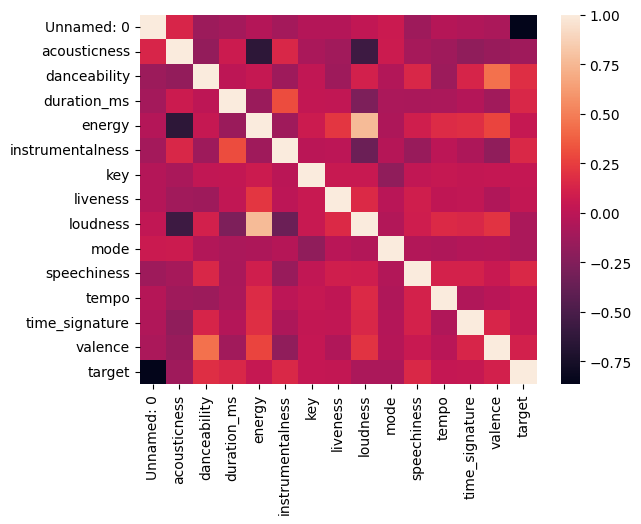

In [40]:
df_corr = spotify_df.corr(method= "pearson")    #devuelve una matriz con todas las correlaciones entre los distintos atributos
sns.heatmap(df_corr)

### Data Wrangling

se normalizan los valores de los campos duration_ms, tempo y loudness para una mejor desempeño del modelo.

In [41]:
def normalizacion (vector):
  min = vector.min()
  max = vector.max()
  return vector /(max-min)

In [42]:
spotify_df['duration_ms'] = normalizacion(spotify_df['duration_ms'])

In [46]:
spotify_df['tempo'] = normalizacion(spotify_df['tempo'])

In [49]:
spotify_df['loudness'] = normalizacion(spotify_df['loudness'])

Revisamos que el dataframe contenga los campos que queremos y que los rangos de valores sean similares.

In [57]:
spotify_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,0.206962,0.434,0.021900,2,0.1650,-0.268222,1,0.4310,0.875140,4.0,0.286,1
1,0.1990,0.743,0.330708,0.359,0.006110,1,0.1370,-0.317200,1,0.0794,0.933581,4.0,0.588,1
2,0.0344,0.838,0.187851,0.412,0.000234,2,0.1590,-0.217993,1,0.2890,0.437646,4.0,0.173,1
3,0.6040,0.494,0.201716,0.338,0.510000,5,0.0922,-0.464654,1,0.0261,0.504269,4.0,0.230,1
4,0.1800,0.678,0.397430,0.561,0.512000,5,0.4390,-0.355230,0,0.0694,1.014766,4.0,0.904,1


In [58]:
spotify_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,0.249150,0.681577,0.133286,5.342588,0.190844,-0.216091,0.612295,0.092664,0.709173,3.968270,0.496815,0.505702
std,0.259989,0.161029,0.082928,0.210273,0.273162,3.648240,0.155453,0.114720,0.487347,0.089931,0.155627,0.255853,0.247195,0.500091
min,0.000003,0.122000,0.016227,0.014800,0.000000,0.000000,0.018800,-1.009363,0.000000,0.023100,0.279107,1.000000,0.034800,0.000000
25%,0.009630,0.514000,0.202325,0.563000,0.000000,2.000000,0.092300,-0.255993,0.000000,0.037500,0.584288,4.000000,0.295000,0.000000
50%,0.063300,0.631000,0.231908,0.715000,0.000076,6.000000,0.127000,-0.190546,1.000000,0.054900,0.708145,4.000000,0.492000,1.000000
75%,0.265000,0.738000,0.273454,0.846000,0.054000,9.000000,0.247000,-0.144739,1.000000,0.108000,0.803916,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.016227,0.998000,0.976000,11.000000,0.969000,-0.009363,1.000000,0.816000,1.279107,5.000000,0.992000,1.000000


### Modelo: entrenamiento y evaluacion.

Debemos predecir si la cancion fue votada como 1 o 0. Es un caso de clasificacion binaria. Los modelos a implementar son los siguientes:
* Naive Bayes
* Regresion Logistica
* KNN
* SVM
* Decision Tree
* Random Forest

Se divide el dataset en 2: train = entrenamiento(80%) y test = evaluacion(20%)

Divido el dataframe spotify_df en X e y:

In [71]:
X = spotify_df.drop(['target'], axis=1)
y = spotify_df['target']

In [72]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

**Naive Bayes**

In [104]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.6625387  0.6501548  0.61609907 0.63043478 0.70186335]
0.6522181412610811


In [105]:
y_hat = gnb.predict(X_test)
model_acc = metrics.accuracy_score(y_test, y_hat)
scores = {'gnb': round(model_acc,3)}

**Regresion Logistica**

In [106]:
lr = LogisticRegression(max_iter = 2000)
lr.fit(X_train, y_train)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.6130031  0.6625387  0.59752322 0.68012422 0.67701863]
0.6460415745245467


In [107]:
y_hat = lr.predict(X_test)
model_acc = metrics.accuracy_score(y_test, y_hat)
scores.update({'lr': round(model_acc,3)})

**KNN**

In [108]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.6130031  0.6130031  0.57275542 0.64596273 0.67701863]
0.6243485952733495


In [109]:
y_hat = knn.predict(X_test)
model_acc = metrics.accuracy_score(y_test, y_hat)
scores.update({'knn': round(model_acc,3)})

Rendimiento del modelo dependiendo del valor de K:

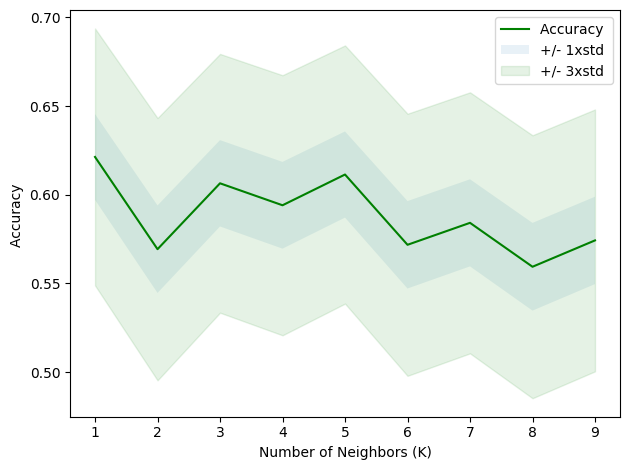

In [117]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

# Ploteo los resultados obtenidos:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

**SVM**

In [110]:
svc = SVC(probability = True)
svc.fit(X_train, y_train)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.51702786 0.61609907 0.54489164 0.57453416 0.62111801]
0.5747341499528873


In [111]:
y_hat = svc.predict(X_test)
model_acc = metrics.accuracy_score(y_test, y_hat)
scores.update({'svc': round(model_acc,3)})

**Decision tree**

In [112]:
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train, y_train)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.6996904  0.67801858 0.68111455 0.70186335 0.66459627]
0.6850566313481914


In [113]:
y_hat = dt.predict(X_test)
model_acc = metrics.accuracy_score(y_test, y_hat)
scores.update({'dt': round(model_acc,3)})

**Random Forest**

In [114]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79256966 0.77399381 0.75541796 0.77018634 0.79813665]
0.7780608811030134


In [115]:
y_hat = rf.predict(X_test)
model_acc = metrics.accuracy_score(y_test, y_hat)
scores.update({'rf': round(model_acc,3)})

In [116]:
scores

{'gnb': 0.661,
 'lr': 0.661,
 'knn': 0.611,
 'svc': 0.584,
 'dt': 0.681,
 'rf': 0.785}